Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [4]:
df = pd.read_csv("Data.csv")
print(df)

       Total Household Income              Region  Staple Food Expenditure  \
0                        9370                 CAR                     1736   
1                        3540                 CAR                      718   
2                        1478                 CAR                     1281   
3                        2199                 CAR                     1273   
4                        4732                 CAR                     1386   
...                       ...                 ...                      ...   
41539                    3820  XII - SOCCSKSARGEN                      906   
41540                    3850  XII - SOCCSKSARGEN                      159   
41541                    4138  XII - SOCCSKSARGEN                     1076   
41542                    4231  XII - SOCCSKSARGEN                     1206   
41543                    4181  XII - SOCCSKSARGEN                     1676   

                 Source of Income  Agricultural Household indic

In [5]:
isnull = df.isnull().sum()
print(isnull)

Total Household Income                     0
Region                                     0
Staple Food Expenditure                    0
Source of Income                           0
Agricultural Household indicator           0
Meat Expenditure                           0
Seafood Expenditure                        0
Leisure Expenditure                        0
Alcohol Expenditure                        0
Tobacco Expenditure                        0
Medical Expenditure                        0
Transportation Expenditure                 0
Communication Expenditure                  0
Utilities Expenditure                      0
Housing Tax                                0
Education Expenditure                      0
Crop Farming Expenditure                   0
Household Head Gender                      0
Household Head Age                         0
Household Head Marital Status              0
Household Head Highest Grade Completed     0
Education Rank                             0
Household 

In [6]:
statistics = df.describe()
print(statistics)

       Total Household Income  Staple Food Expenditure  \
count            41544.000000             41544.000000   
mean              5391.412310               908.705108   
std               6946.279063               472.302660   
min                214.000000                 0.000000   
25%               2309.000000               604.000000   
50%               3662.000000               848.000000   
75%               6233.250000              1142.000000   
max             342632.000000             27322.000000   

       Agricultural Household indicator  Meat Expenditure  \
count                      41544.000000      41544.000000   
mean                           0.429858        188.230310   
std                            0.676666        187.459972   
min                            0.000000          0.000000   
25%                            0.000000         60.000000   
50%                            0.000000        131.000000   
75%                            1.000000        255

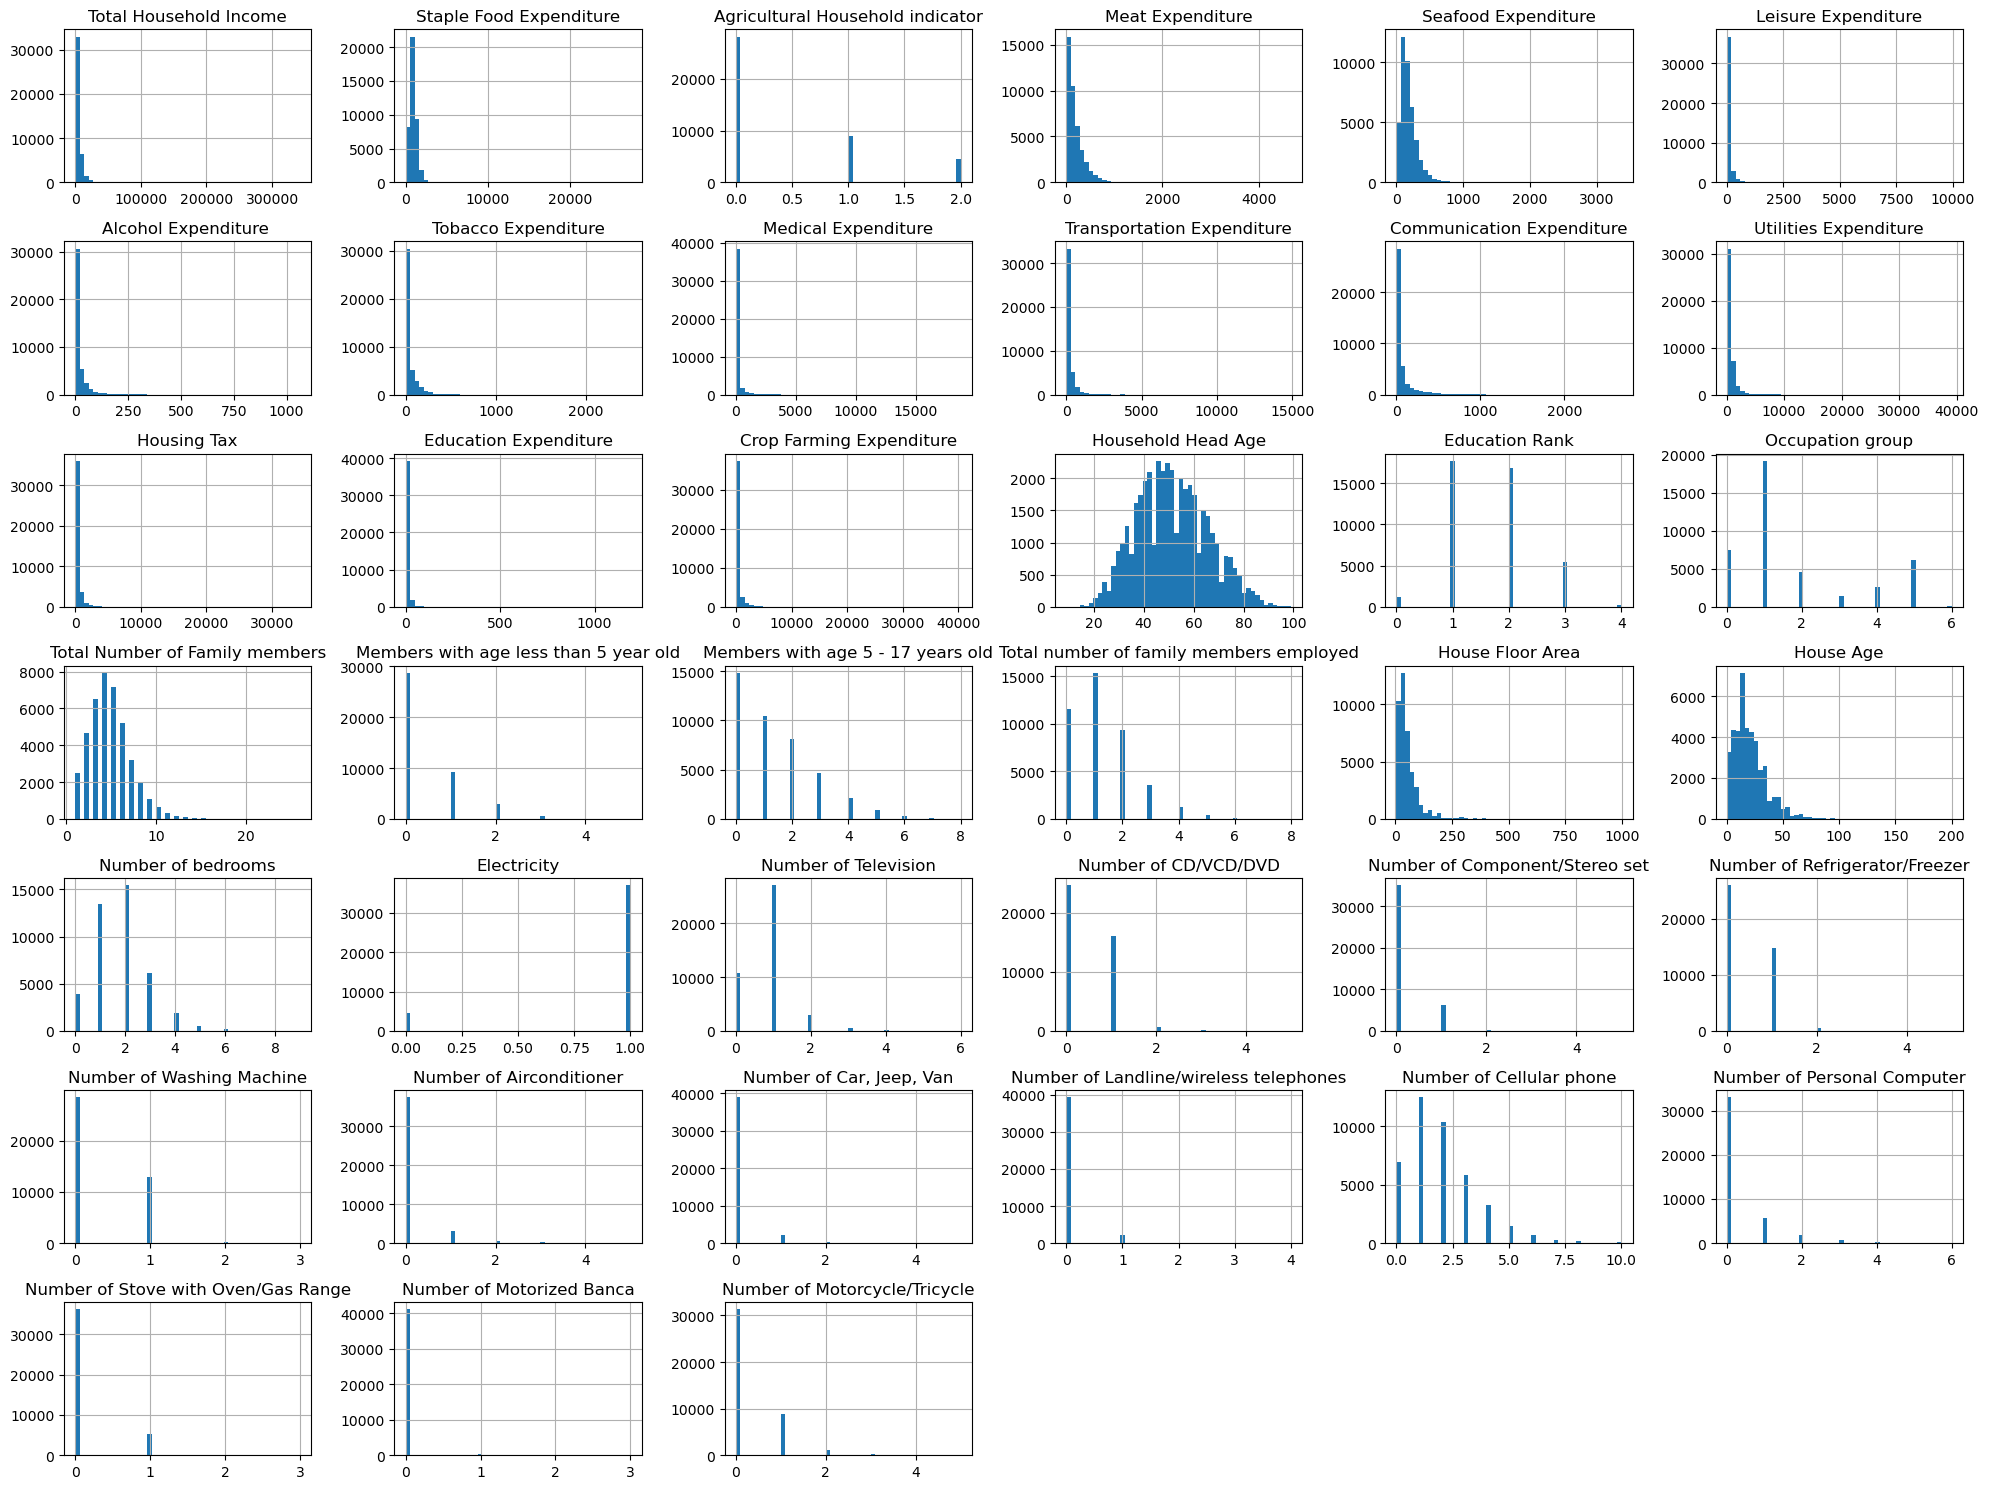

In [7]:
df.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

In [8]:
#Normalization 
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = df.select_dtypes(include=[np.number]).columns

# Apply the scaler to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df.head())

   Total Household Income Region  Staple Food Expenditure Source of Income  \
0                0.026739    CAR                 0.063539             Wage   
1                0.009713    CAR                 0.026279             Wage   
2                0.003691    CAR                 0.046885             Wage   
3                0.005797    CAR                 0.046592             Wage   
4                0.013194    CAR                 0.050728             Wage   

   Agricultural Household indicator  Meat Expenditure  Seafood Expenditure  \
0                               0.0          0.094412             0.089259   
1                               0.0          0.066581             0.058911   
2                               0.5          0.029758             0.013686   
3                               0.0          0.041747             0.057423   
4                               0.0          0.070221             0.060101   

   Leisure Expenditure  Alcohol Expenditure   Tobacco Expendit

In [9]:
# Define the spending columns
spending_columns = [
    'Staple Food Expenditure', 'Meat Expenditure', 'Seafood Expenditure', 
    'Leisure Expenditure', 'Alcohol Expenditure ', 'Tobacco Expenditure', 
    'Medical Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 
    'Utilities Expenditure', 'Housing Tax', 'Education Expenditure', 
    'Crop Farming Expenditure'
]

# Filter the dataframe
df_cleaned = df[df[spending_columns].ge(df['Total Household Income'], axis=0).all(axis=1)]

print(df_cleaned)

       Total Household Income Region  Staple Food Expenditure  \
22638                     0.0    CAR                 0.006185   

              Source of Income  Agricultural Household indicator  \
22638  Other sources of Income                               0.0   

       Meat Expenditure  Seafood Expenditure  Leisure Expenditure  \
22638          0.003639             0.001785             0.000402   

       Alcohol Expenditure   Tobacco Expenditure  ...  \
22638                   0.0                  0.0  ...   

       Number of Refrigerator/Freezer  Number of Washing Machine  \
22638                             0.0                        0.0   

       Number of Airconditioner  Number of Car, Jeep, Van  \
22638                       0.0                       0.0   

       Number of Landline/wireless telephones  Number of Cellular phone  \
22638                                     0.0                       0.0   

       Number of Personal Computer Number of Stove with Oven/Gas Ra

In [10]:
# Define the columns that represent sources of income
income_columns = [
    'Wage', 'Enterpreneurial Activities', 'Other Sources of Income'
]

# Ensure the columns exist in the dataframe
for col in income_columns:
    if col not in df.columns:
        df[col] = 0

# Create a new column 'Total Income' by summing up the income columns
df['Total Income'] = df[income_columns].sum(axis=1)

print(df[['Total Household Income', 'Total Income']].head())

   Total Household Income  Total Income
0                0.026739             0
1                0.009713             0
2                0.003691             0
3                0.005797             0
4                0.013194             0


Hypothesis
Hypothesis 1: Education Level and Total Expenditure
H1: Higher levels of education are associated with higher total household expenditure.
Rationale: Individuals with higher education levels may have better job opportunities and higher incomes, leading to increased spending on various goods and services.

Hypothesis 2: Education Level and Expenditure on Necessities
H2: Households with lower education levels spend a higher percentage of their total expenditure on necessities (e.g., food, housing, utilities) compared to households with higher education levels.
Rationale: Lower-educated households may have lower incomes, necessitating a larger portion of their budget to cover basic needs.

Engel's Law, often referred to in the context of economics, suggests that as the level of education increases, the consumption patterns of households change, particularly in relation to necessities and luxuries. This law can be applied to Hypothesis 2, which states: "Households with lower education levels spend a higher percentage of their total expenditure on necessities (e.g., food, housing, utilities) compared to households with higher education levels.

Understanding Consumption Patterns:
According to Engel's Law, as education levels rise, households tend to shift their consumption from necessities to discretionary or luxury items. This is because higher education often correlates with higher income, allowing households to allocate a smaller percentage of their income to basic needs.
Income and Expenditure Relationship:
Households with lower education levels typically have lower incomes, which means they must allocate a larger portion of their total expenditure to cover essential needs. Engel's Law supports this by indicating that as education increases, the marginal utility derived from spending on necessities decreases, leading to a lower percentage of income spent on these items.


In order to test this hypothesis we apply a correlation matrix of Total household spending to the various types of expenses.


In [11]:
# Calculate the correlation matrix
correlation_matrix = df[['Total Household Income'] + spending_columns].corr()

# Extract the correlation values between 'Total Household Income' and each expenditure column
income_expenditure_correlation = correlation_matrix['Total Household Income'][spending_columns]

print(income_expenditure_correlation)

Staple Food Expenditure       0.288140
Meat Expenditure              0.495391
Seafood Expenditure           0.366838
Leisure Expenditure           0.344079
Alcohol Expenditure           0.146532
Tobacco Expenditure           0.063997
Medical Expenditure           0.266922
Transportation Expenditure    0.563468
Communication Expenditure     0.622691
Utilities Expenditure         0.598143
Housing Tax                   0.504441
Education Expenditure         0.212422
Crop Farming Expenditure      0.187399
Name: Total Household Income, dtype: float64


plot correlation matrix

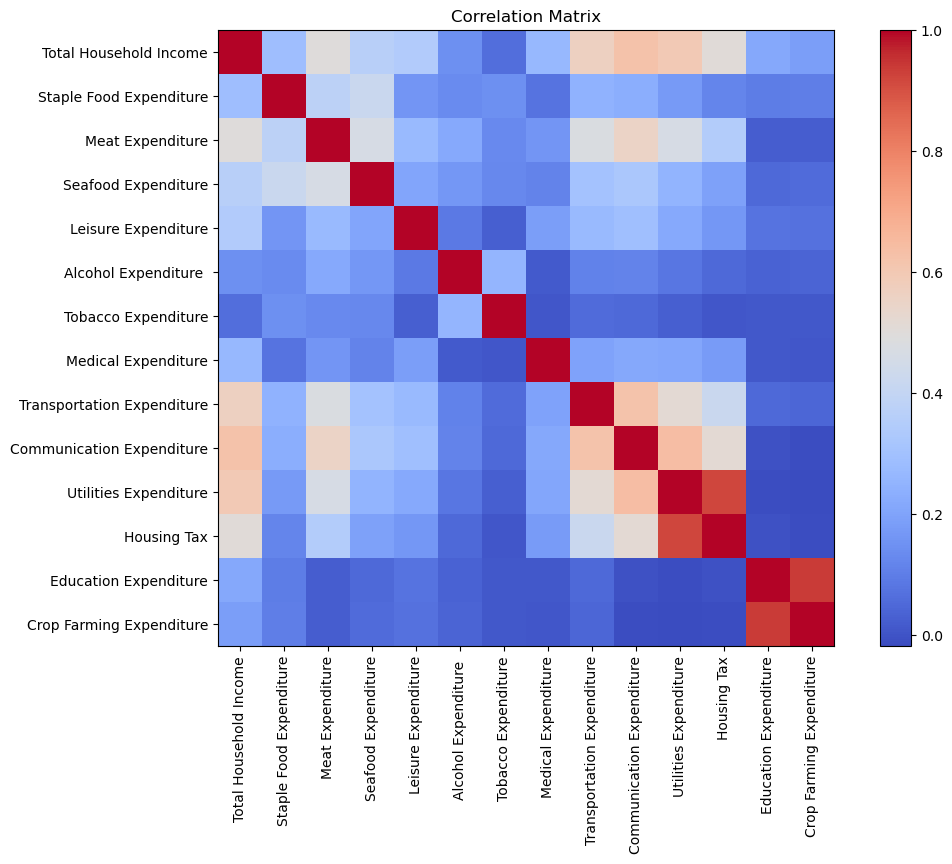

In [12]:
# Visualize the correlation matrix using numpy and matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix')
plt.show()

From our output, our data suggests that more individual's income parttens is closly related to expenditure on staple food & least related to crop farming meaning perhaps those earning less will be the ones to adapt crop farming so as to better their income sourse, which make economic sense.





In [13]:
# Calculate the correlation between 'Total Household Income' and 'Education Expenditure'
income_education_correlation = df['Total Household Income'].corr(df['Education Expenditure'])

print(f"Correlation between Total Household Income and Education Expenditure: {income_education_correlation}")

Correlation between Total Household Income and Education Expenditure: 0.21242222530996777


In [14]:
import statsmodels.api as sm

# Define the dependent variable (Education Expenditure) and the independent variable (Total Household Income)
X = df['Total Household Income']
y = df['Education Expenditure']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Education Expenditure   R-squared:                       0.045
Model:                               OLS   Adj. R-squared:                  0.045
Method:                    Least Squares   F-statistic:                     1963.
Date:                   Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                           20:32:57   Log-Likelihood:             1.2314e+05
No. Observations:                  41544   AIC:                        -2.463e+05
Df Residuals:                      41542   BIC:                        -2.463e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

As regression model is not good, we can try to use other models like Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Total Household Income']]
y = df['Education Expenditure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.00015590590241717077
R^2 Score: 0.23130043465526096


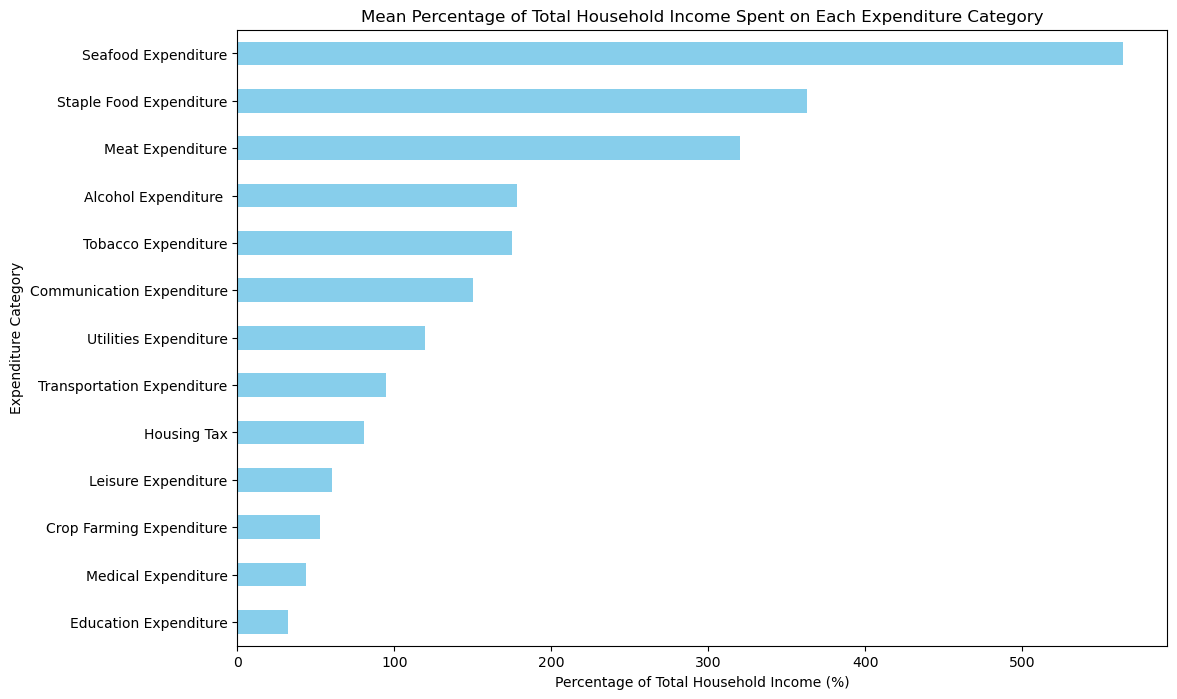

In [22]:
# Calculate the percentage of total household income spent on each expenditure category
percentage_expenditure = df[spending_columns].div(df['Total Household Income'], axis=0) * 100

# Replace infinite values with NaN
percentage_expenditure.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate the mean percentage for each expenditure category, ignoring NaN values
mean_percentage_expenditure = percentage_expenditure.mean()

# Plot the mean percentage expenditure
plt.figure(figsize=(12, 8))
mean_percentage_expenditure.dropna().sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Total Household Income (%)')
plt.ylabel('Expenditure Category')
plt.title('Mean Percentage of Total Household Income Spent on Each Expenditure Category')
plt.show()

Provide Pie Visual

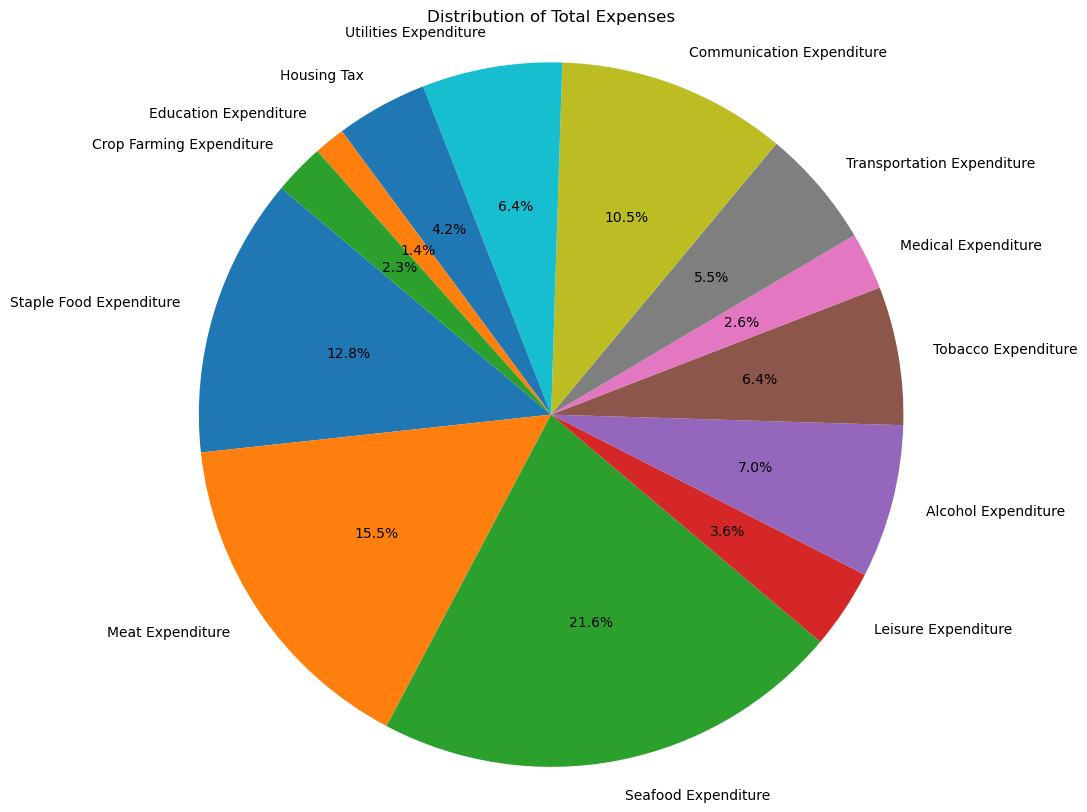

In [17]:
# Select the columns that represent expenses
expenses = df[spending_columns].sum()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(expenses, labels=spending_columns, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Expenses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Based on the output above we safely say that the propotion of Income allocated to education is the least significant, however this raises another question if this could be due to high education Subsidies may skew the data, particularly as it appears to reflect a population of low-income individuals who struggle to afford education. Therefore, in alignment with our hypothesis, we aim to explore Engel’s Law, which asserts that as household income increases, the proportion of income allocated to food expenses decreases. In this context, we will focus specifically on expenditures related to staple foods, meat, and seafood, given the notable observation that these categories account for over 50% of household income.

To test this theory using our data, we will follow these steps:

1. Calculate the maximum, minimum, and median income values.
2. Segment the data into two groups: one comprising lower-income earners (defined as those earning less than or equal to the median income, and greater than or equal to the minimum income) and the other encompassing higher-income earners (those earning above the median income but less than or equal to the maximum income).
3. Subsequently, we will plot the two datasets, compare the results, and draw conclusions based on the findings.
 

Find Min, Median & Max

In [18]:
# Find the highest income value
highest_income = df['Total Household Income'].max()

# Find the lowest income value
lowest_income = df['Total Household Income'].min()

# Find the median income value
median_income = df['Total Household Income'].median()

print(f"Highest Income: {highest_income}")
print(f"Lowest Income: {lowest_income}")
print(f"Median Income: {median_income}")

Highest Income: 1.0
Lowest Income: 0.0
Median Income: 0.010069564100018106


Plot Low Income Pie

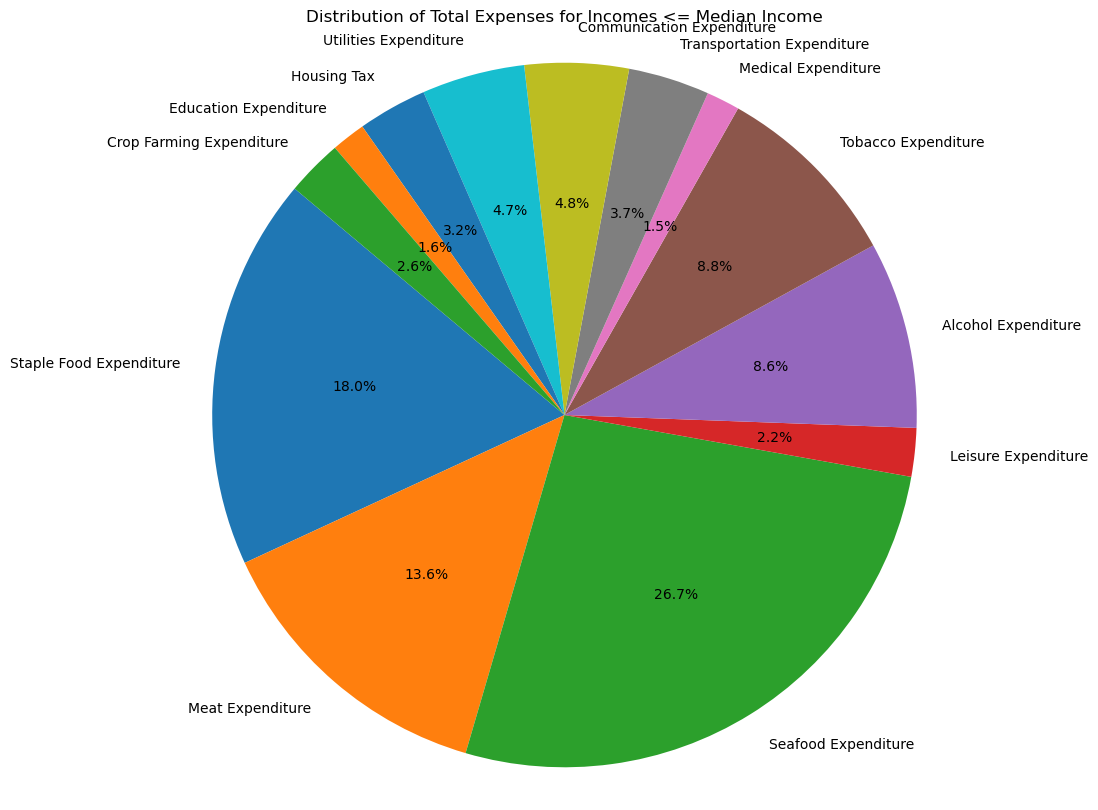

In [19]:
# Filter the dataframe for incomes less or equal to the median income
df_median_income = df[df['Total Household Income'] <= median_income]

# Calculate the sum of expenses for the filtered dataframe
expenses_median_income = df_median_income[spending_columns].sum()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(expenses_median_income, labels=spending_columns, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Expenses for Incomes <= Median Income')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Plot High Income Pie

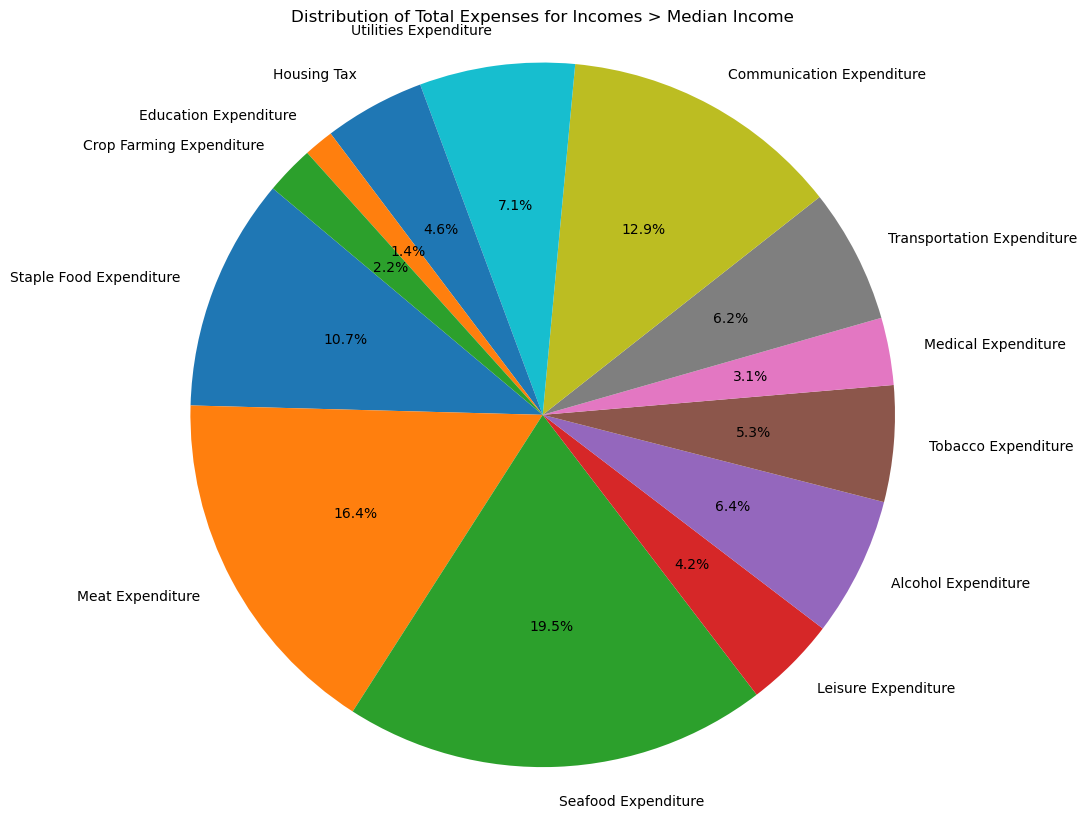

In [20]:
# Filter the dataframe for incomes greater than the median income
df_above_median_income = df[df['Total Household Income'] > median_income]

# Calculate the sum of expenses for the filtered dataframe
expenses_above_median_income = df_above_median_income[spending_columns].sum()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(expenses_above_median_income, labels=spending_columns, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Expenses for Incomes > Median Income')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Side By Side Analysis

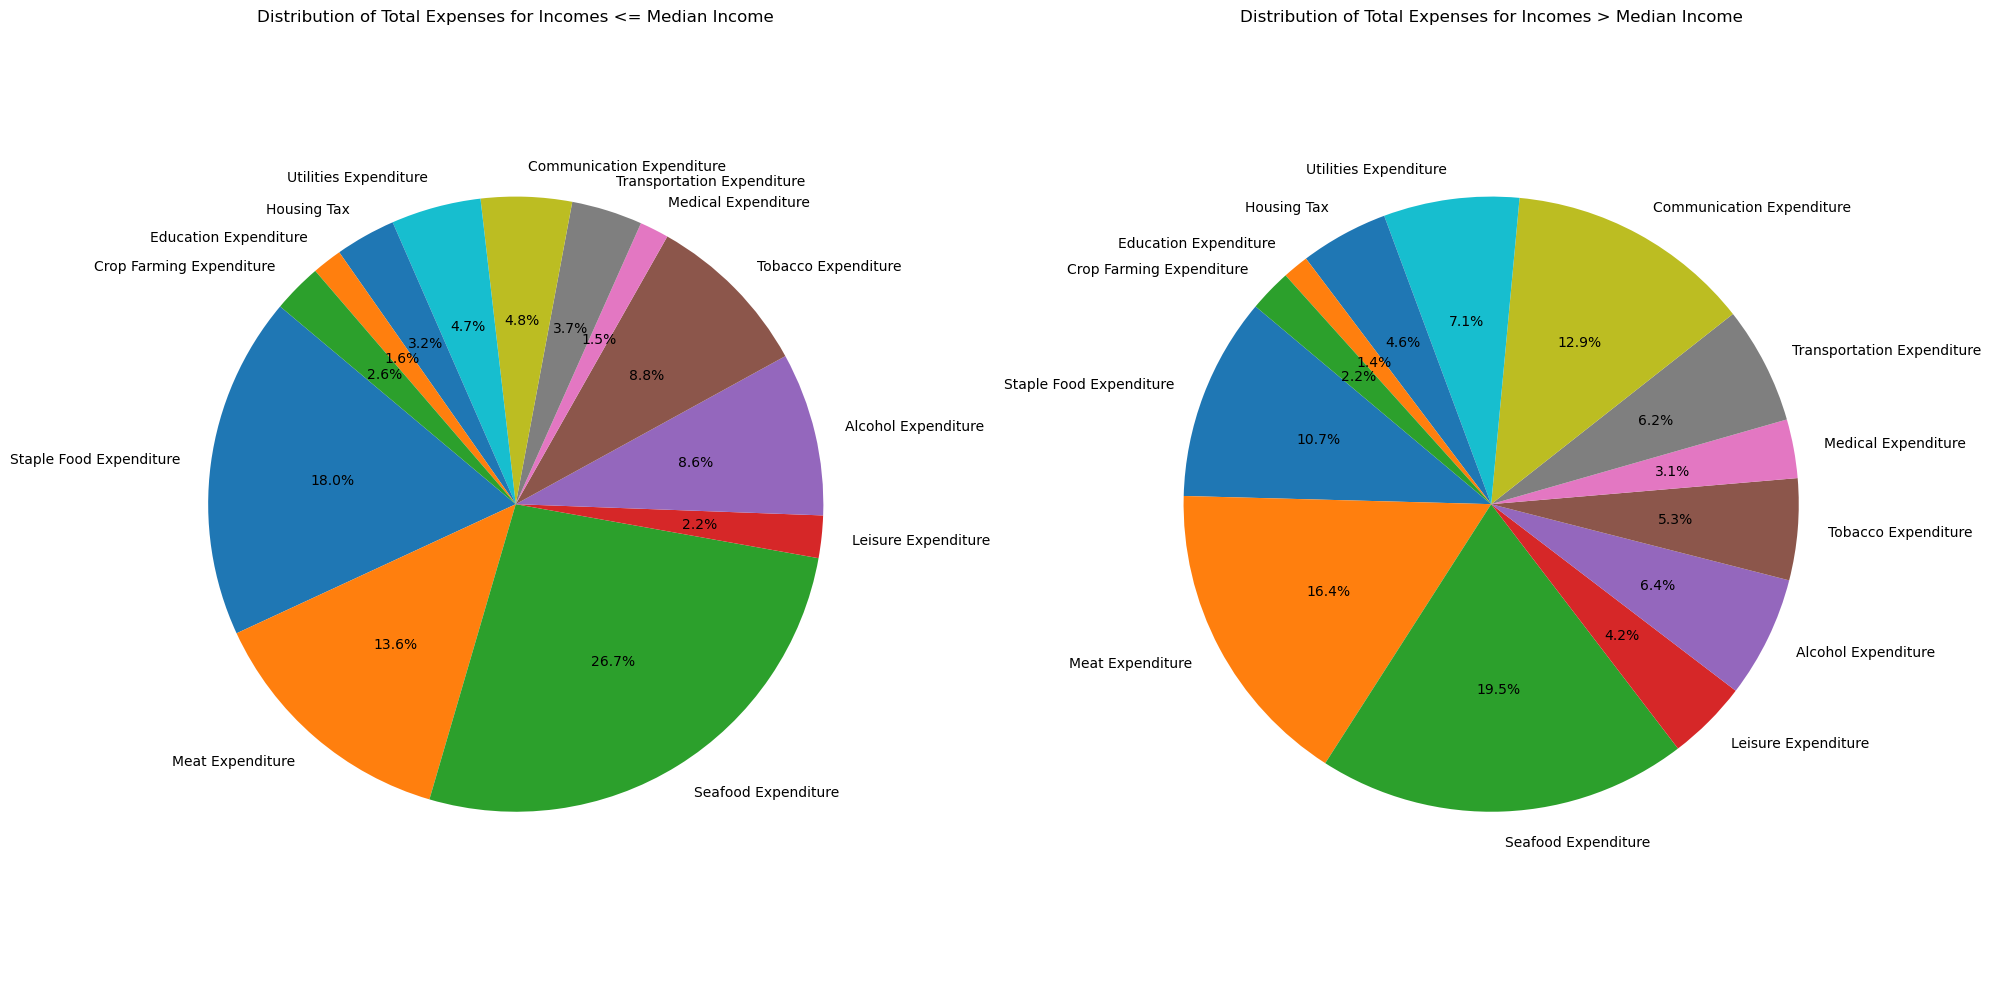

In [21]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot the pie chart for incomes <= median income
axs[0].pie(expenses_median_income, labels=spending_columns, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Total Expenses for Incomes <= Median Income')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot the pie chart for incomes > median income
axs[1].pie(expenses_above_median_income, labels=spending_columns, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Total Expenses for Incomes > Median Income')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plots
plt.tight_layout()
plt.show()

Conclusion

In examining our basket of seafood, meat, and staple foods, we can see a significant difference in income allocation to food between the two income groups. Lower earners allocate 58.3% of their income to food, while higher earners allocate only 46.6%. This trend supports our hypothesis that as income increases, the proportion of income spent on food decreases. 

Additionally, we note that higher earners tend to spend more on other expenses. For instance, those with more financial resources are likely to choose personal vehicles over public transportation. In terms of communication, they can afford 5G services, while those with lower incomes might opt for the more affordable 4G alternatives. Similarly, expenditures on utilities and leisure activities also take up a larger portion of the income for higher earners.

From this analysis, we can conclude that education has a strong impact on spending habits related to necessities. Therefore, higher levels of education correlate with increased total household expenditure.
